### Zadanie: wizualizacja
Poznaliśmy już pierwszy model dla regresji logistycznej, teraz sprawdź jak zachowuje się model dla różnych regularyzacji i ich stopnia. Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).

Link do swoich wizualizacji prześlij Mentorowi.

In [122]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')

In [123]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], 
                                y, test_size=0.30, random_state=0, stratify=y)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr1 = LogisticRegression(penalty='l1', C=0.2, solver='saga')
model_lr1.fit(X_train_standardized, y_train)

LogisticRegression(C=0.2, penalty='l1', solver='saga')

C:\Users\magda\AppData\Local\Temp\ipykernel_16296\966604719.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


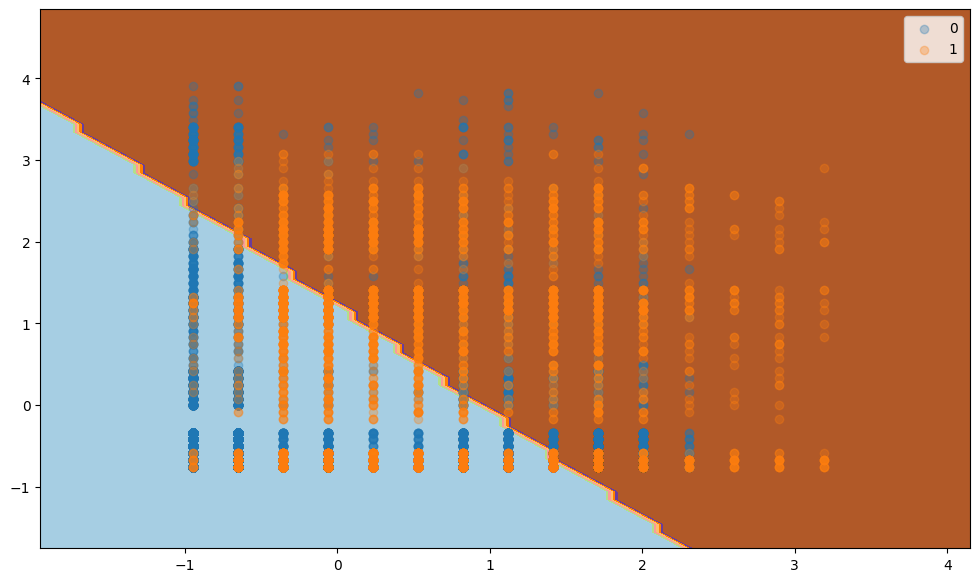

In [127]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, 
                    label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_lr1)

In [128]:
# predictions_lr = model_lr1.predict(X_test_standardized)

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [130]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # F1, Accuracy
    print(classification_report(y_checked, predictions))

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

In [131]:
calculate_metrics(model_lr1, 'Logistic Regression - l1 (train)', X_train_standardized, y_train)
calculate_metrics(model_lr1, 'Logistic Regression - l1 (test)', X_test_standardized, y_test)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      7000
           1       0.64      0.48      0.55      3500

    accuracy                           0.74     10500
   macro avg       0.70      0.67      0.68     10500
weighted avg       0.72      0.74      0.72     10500

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.74      0.74      4500



C:\Users\magda\AppData\Local\Temp\ipykernel_16296\1401985251.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
C:\Users\magda\AppData\Local\Temp\ipykernel_16296\1401985251.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - l1 (train),0.546404,0.814039
1,Logistic Regression - l1 (test),0.577289,0.816493


In [132]:
model_lren = LogisticRegression(penalty='elasticnet', C=0.9, solver='saga', l1_ratio=0.5)
model_lren.fit(X_train_standardized, y_train)

LogisticRegression(C=0.9, l1_ratio=0.5, penalty='elasticnet', solver='saga')

C:\Users\magda\AppData\Local\Temp\ipykernel_16296\966604719.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


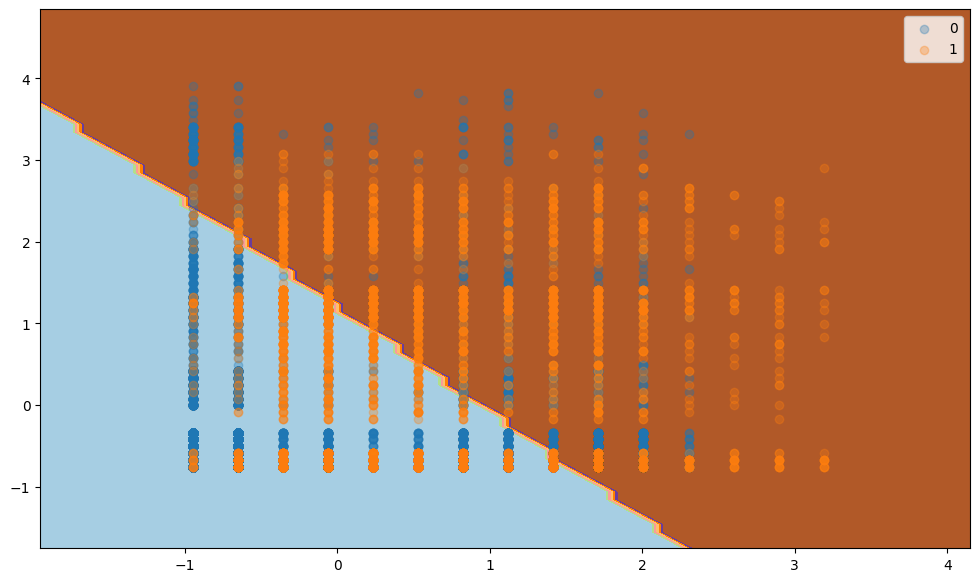

In [133]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_lren)

In [134]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # F1, Accuracy
    print(classification_report(y_checked, predictions))

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe
    
calculate_metrics(model_lren, 'Logistic Regression - elastic net (train)', X_train_standardized, y_train)
calculate_metrics(model_lren, 'Logistic Regression - elastic net1 (test)', X_test_standardized, y_test)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      7000
           1       0.64      0.48      0.55      3500

    accuracy                           0.74     10500
   macro avg       0.70      0.67      0.68     10500
weighted avg       0.72      0.74      0.72     10500

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



C:\Users\magda\AppData\Local\Temp\ipykernel_16296\501600430.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
C:\Users\magda\AppData\Local\Temp\ipykernel_16296\501600430.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - elastic net (train),0.546878,0.814039
1,Logistic Regression - elastic net1 (test),0.580928,0.816493
